# Predicting Total Energy Yield of a Gas Turbine

## Phase 1: Data preparation and Visualisation

### Group name: Group 10


---

## Table of Contents
1. [**Introduction**](#introduction) <br>
    1.1. Dataset Source <br>
    1.2. Dataset Details <br>
    1.3. Dataset Features <br>
    1.4. Target Feature <br>
2. **Objective For the Project** <br>
3. **Data Preprocessing and Cleaning**<br>
4. **Exploratory Data Analysis Through Visualisation** <br>
    3.1. Univariate Plots <br>
    3.2. Bivariate Plots <br>
5. **Conclusions** <br>
6. **References**

## Introduction

### Dataset Source
The dataset used for this project was taken from the UCI machine learning repository (Heysem Kaya, 2022). It contains various measurements taken from different sensors located in a gas turbine in Turkey to study the emissions of carbon monoxide and nitrogen oxides. The recordings in the datset were taken in the year 2015. 

### Dataset Details
The dataset contains information on the total yeild energy of a gas turbine located in Turkey. The gas turbine was used to measure the flue gas emissions, i.e. a mix of carbon monoxide and nitrogen oxides.

The datset has attributes such as atmospheric temperature, ambient pressure, ambient humidity, gas turbine inlet and exhaust pressures, and much more. All the readings show the changes in the variables during one hour of operation of the turbine.

This dataset has readings taken from various sensors in the year 2015. It has 7384 observations and 11 variables. 

#### Initialisation
* Importing important libraries required for this project
* Reading the datset correctly

In [10]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")


In [11]:
#loading the dataset and checking the head of the same to see if it has been loaded in properly
GT_emissions = pd.read_csv("Phase1_Group91.csv")
GT_emissions.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


Let us now check the shape of the dataset. This will give us an idea about the size of the whole dataset.

In [13]:
GT_emissions.shape

(7384, 11)

We can see that the dataset is quite large and has 7384 rows.

### Dataset Features

Tabulating the datset features for a better understanding of the dataset and its variables. The following descriptions are taken from the source of the dataset which is the UCI Machine Learning Repository.

In [17]:
#Tabulating the dataset
from tabulate import tabulate

table = [['Name', 'Description', 'Units'],
        ['AT', 'Ambient Temperature','Celsius'],
        ['AP', 'Ambient Pressure','mbar'],
        ['AH', 'Ambient Humidity', '%'],
        ['AFDP', 'Air Filter Difference Pressure', 'mbar'],
        ['GTEP', 'Gas Turbine Exhaust Pressure', 'mbar'],
        ['TIT', 'Turbine Inlet temperature', 'Celsius'],
        ['TAT', 'Turbine After temperature', 'Celsius'],
        ['TEY', 'Turbine Energy Yield', 'Megawatt hour (MWH)'],
        ['CDP', 'Compressor Discharge Pressure', 'mbar'],
        ['CO', 'Carbon monoxide content','mg/m3'],
        ['NOX', 'Nitrogen oxides content', 'mg/mg3']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════════════╤═════════════════════╕
│ Name   │ Description                    │ Units               │
╞════════╪════════════════════════════════╪═════════════════════╡
│ AT     │ Ambient Temperature            │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ AP     │ Ambient Pressure               │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ AH     │ Ambient Humidity               │ %                   │
├────────┼────────────────────────────────┼─────────────────────┤
│ AFDP   │ Air Filter Difference Pressure │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ GTEP   │ Gas Turbine Exhaust Pressure   │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ TIT    │ Turbine Inlet temperature      │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ TAT    │

### Target Feature
The target feature for this project will be the prediction of Turbine Energy Yeild (TEY) which is calculated in Megawatt hour. Descriptive variables from the datset will be used to predict the Turbine Energy Yeild of a gas turbine.

## Objective For The Project
There is an increasing demand for energy. To meet the growing demands, companies have to come up with innovative solutions which can have adverse affects on the environment. Growing demand of power has to be met with how efficiently the power is produced. Accurately predicting the Total Energy Yield will help maintain and optimise conditions that can give the highest yield in the most efficient way.

## Data Preprocessing and Cleaning
The necessary steps taken to preprocess and clean the data are mentioned below:
* Checking for any irrelevant features in the dataset and dropping them
* Checking for null / missing values
* Remove all rows with missing values
* Check for different data types

#### Checking the dataset for irrelevant features

In [22]:
GT_emissions.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

There is no specific column which can be dropped now without doing any furhter analysis. Everything has its unique value. Therefore, for this step, no variables are droppped.

#### Checking for null / missing values

In [25]:
#Sum of all null values
GT_emissions.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

As we can see from above, there are no null values present in any variable in the dataset. Dropping of observations is therefore not required.

#### Removing all rows with missing values

Since the dataset does not have any missing or null values present, no observation is removed.

In [29]:
#If any null values were present, removing of observations could have been carried out using the following line of code:
#GT_emissions = GT_emissions.dropna()   ##This will remove all null values. Since we do not have any null values in the dataset, this code is not immplemented

#### Checking for different data types
This check is done to ensure all variables have the correct intended data types

In [31]:
#Data types
GT_emissions.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

#### Summary Statistics
Since all the variables in the dataset are numerical, we can use summary statistics to get a gist of information about the dataset.

In [33]:
#Summary statistics
GT_emissions.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,7384.0,17.225259,8.095783,-6.2348,11.073250,17.4565,23.684750,37.1030
AP,7384.0,1014.509110,6.895430,989.4000,1009.675000,1014.0000,1018.300000,1036.6000
AH,7384.0,68.647464,13.541116,24.0850,59.447250,70.9520,79.653750,96.6660
AFDP,7384.0,3.598909,0.610226,2.3688,3.117300,3.5385,4.194825,5.2395
GTEP,7384.0,26.130149,4.473737,17.6980,23.147000,25.3310,30.018250,40.7160
TIT,7384.0,1078.974689,19.762449,1016.0000,1070.500000,1080.3000,1099.900000,1100.4000
TAT,7384.0,546.642484,5.489066,516.0400,544.747500,549.7200,550.030000,550.5900
TEY,7384.0,133.993380,16.179208,100.0200,126.255000,131.6000,147.160000,179.5000
CDP,7384.0,12.097025,1.136601,9.8708,11.465750,11.9330,13.148000,15.1590
CO,7384.0,3.129986,2.234962,0.2128,1.808175,2.5334,3.702550,41.0970


We can now reconfirm that there are no missing values in any of the variables (This can be seen in the first column. The count for all variables are the same) and therefore no dropping of observations will be necessary. Let us now proceed to the visualisations to see if we can observe anything interesting.

## Exploratory Data Analysis through Visualisation
The data pre processing is now complete and the dataset is clean to proceed with further analysis. We will be using various graphs to understand the data better.

### Univariate plots

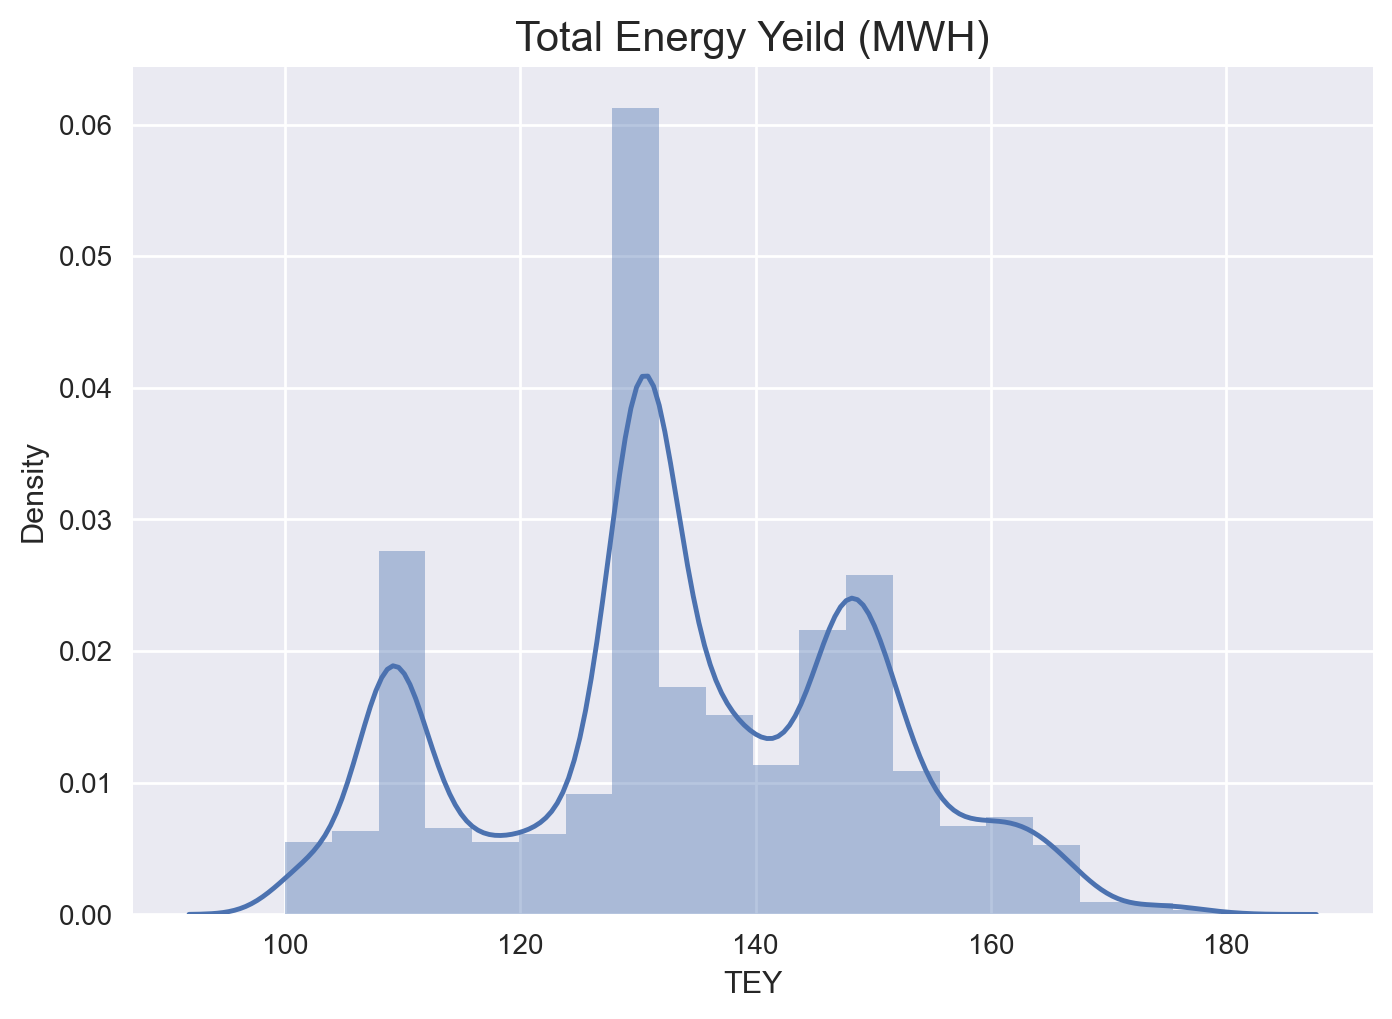

In [37]:
#Checking the distribution of the variable Total Yeild Energy (TEY)
sns.distplot(GT_emissions['TEY'], kde=True, bins=20).set_title('Total Energy Yeild (MWH)', fontsize = 15)
plt.show();

According to the graph, we can see that the highest yield can be seen in the 130 MWH mark. This shows that in most conditions, the turbine can yield the said amount of energy. This result was also seen in the summary statistics as the mean TEY was 134 MWH.

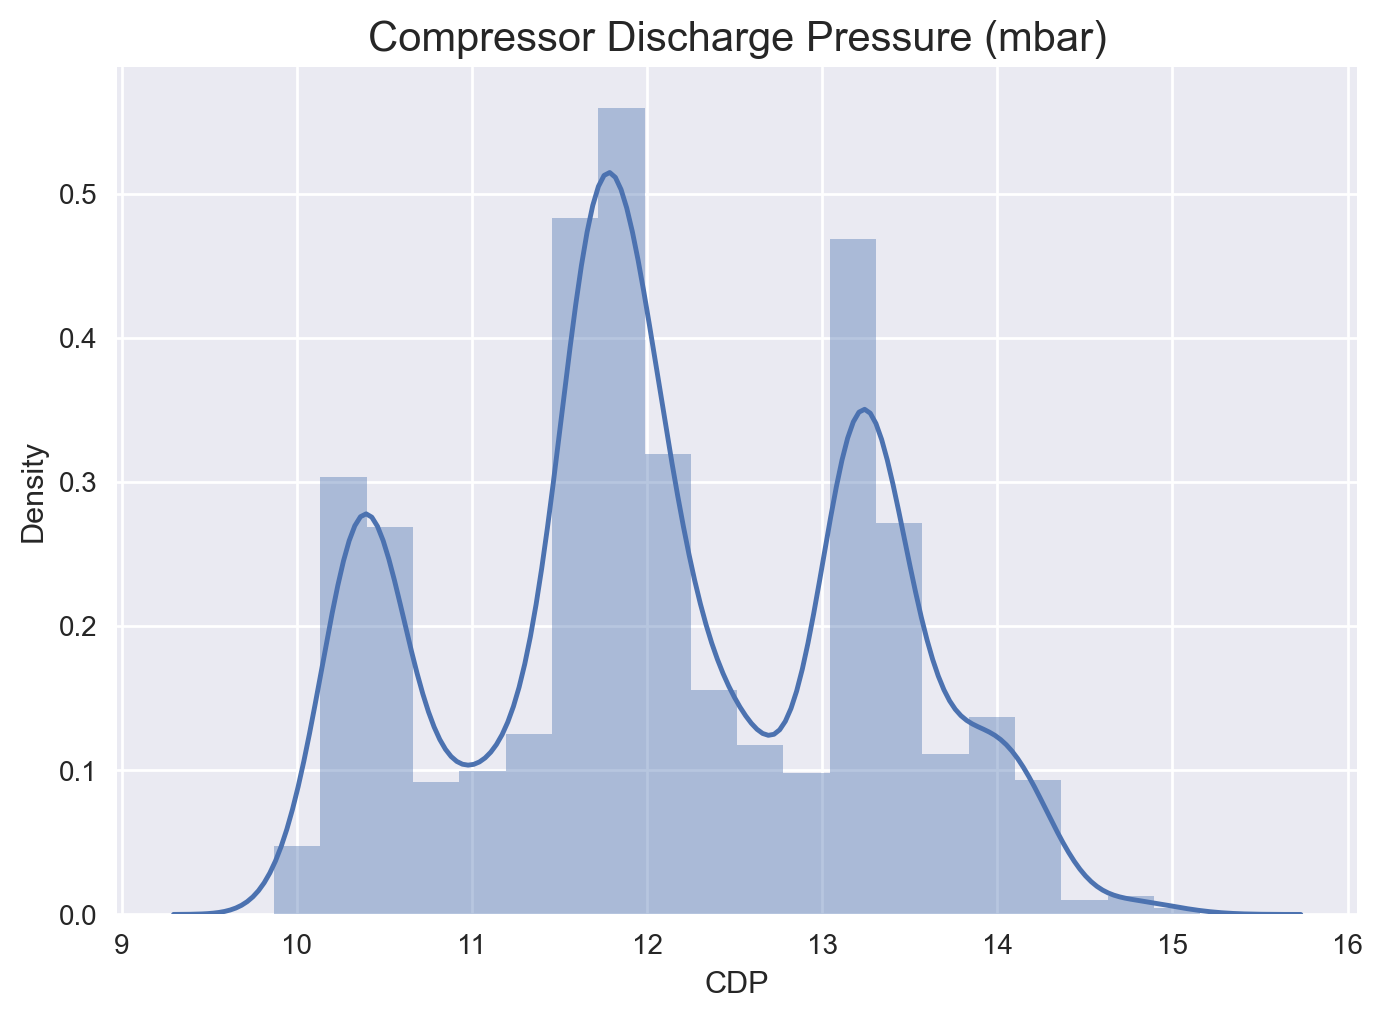

In [39]:
sns.distplot(GT_emissions['CDP'], kde=True, bins=20).set_title('Compressor Discharge Pressure (mbar)', fontsize = 15)
plt.show();

From the graph above, we can see that it follows a similar pattern as TEY. This means there is some correlation between the two variables. we can further look at the correlations during the bivariate plots.

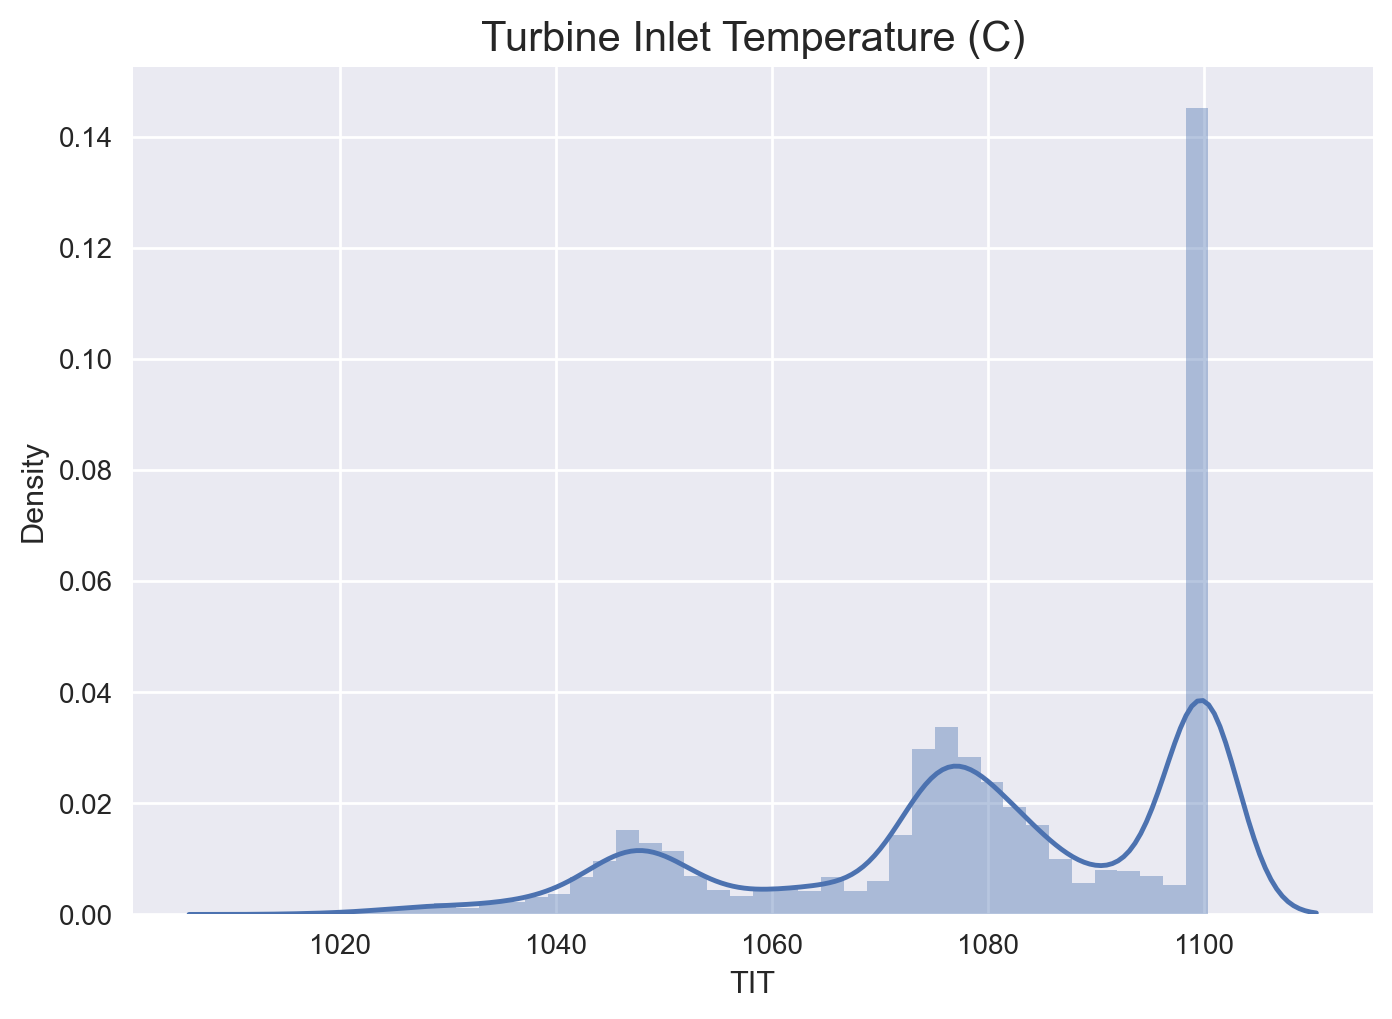

In [41]:
sns.distplot(GT_emissions['TIT'], kde=True, bins=40).set_title('Turbine Inlet Temperature (C)', fontsize = 15)
plt.show();

Gas turbines usually have the highest efficiency when the inlet temperature is high. However, this graph does not compare with the mean we got from summary statistics. This needs to be investigated further. We can clearly see a high peak at around 1100 degrees, but the mean for this variable is 1079 degrees. The lower section of the graph could also be due to the presence of outliers which we will be looking at using boxplots.

In [43]:
#Box plot for TEY
plt.boxplot(GT_emissions['TEY'])
plt.title('Box Plot For Total Energy Yield')

Text(0.5, 1.0, 'Box Plot For Total Energy Yield')

There are some values that are lying outside the boxplot. However, we do not have enough evidence to suggest that they might be potential outliers.

In [45]:
#Box plot for TIT
plt.boxplot(GT_emissions['TIT'])
plt.title('Box Plot For Turbine Inlet Temperature')

Text(0.5, 1.0, 'Box Plot For Turbine Inlet Temperature')

In [46]:
GT_emissions.drop(GT_emissions[GT_emissions['TIT'] <= 1030].index, inplace = True)
GT_emissions.shape

(7299, 11)

Looking at the boxplot, we can assume that there might be certain potential outliers present in this variable. Therefore, treating the outliers is an important step for any machine learning  problem as it might affect teh accuracy of the program later on.

In [48]:
#Checking after removal of outliers
plt.boxplot(GT_emissions['TIT'])
plt.title('Box Plot For Turbine Inlet Temperature')

Text(0.5, 1.0, 'Box Plot For Turbine Inlet Temperature')

The outliers are now removed. Let us now move on to bivariate plots for further analysis.

### Bivariate Plots
For Bivaraite plots, we will be comparing TEY against TIT, CDP, AFDP, GTEP, AP, and AT. According to research, the total energy yield (TEY) is mostly affected by the above mentioned variables.

In [51]:
#Scatter plot between TEY and TIT
plt.scatter(GT_emissions['TEY'], GT_emissions['TIT'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('Turbine Inlet Temperature in C')

Text(53.722222222222214, 0.5, 'Turbine Inlet Temperature in C')

In [52]:
#Scatter plot between TEY and CDP
plt.scatter(GT_emissions['TEY'], GT_emissions['CDP'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('COmpressor Discharge Pressure in mbar')

Text(53.722222222222214, 0.5, 'COmpressor Discharge Pressure in mbar')

In [53]:
#Scatter plot between TEY and AFDP
plt.scatter(GT_emissions['TEY'], GT_emissions['AFDP'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('Air Filter Difference Pressure in mbar')

Text(53.722222222222214, 0.5, 'Air Filter Difference Pressure in mbar')

In [54]:
#Scatter plot between TEY and GTEP
plt.scatter(GT_emissions['TEY'], GT_emissions['GTEP'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('Gas Turbine Exhaust Pressure in mbar')

Text(53.722222222222214, 0.5, 'Gas Turbine Exhaust Pressure in mbar')

In [55]:
#Scatter plot between TEY and AT
plt.scatter(GT_emissions['TEY'], GT_emissions['AT'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('Ambient Temperature in Celsius')

Text(53.722222222222214, 0.5, 'Ambient Temperature in Celsius')

In [56]:
#Scatter plot between TEY and AP
plt.scatter(GT_emissions['TEY'], GT_emissions['AP'])
plt.xlabel('Total Energy Yield in MWH')
plt.ylabel('Ambient Pressure in mbar')

Text(53.722222222222214, 0.5, 'Ambient Pressure in mbar')

From the plots above, we can see that TEY is heavily correlated with AFDP, CDP, GTEP and TIT. A weak correaltion can be seen between TEY with AT and AP. Looking at the plots, it is safe to say that the total energy yield does not depend heavily on the ambient temperature or the ambient pressure. To further understand this data, let us look at a heatmap which will give us a better idea about the correlation between the variables.

In [58]:
sns.heatmap(GT_emissions.corr())

<Axes: title={'center': 'Box Plot For Turbine Inlet Temperature'}>

The heatmap only confirms what we have seen in the bivariate analysis. TEY has a very high correlation with CDP, TIT, GTEP, and AFDP. We can also see some weak correlation between TEY and AT. 

## Conclusions

Data cleaning, data preprocessing, and data visualisation was used in Phase 1 of this project. Starting the phase 1 of the project with identifying the target variable, we checked for the data types of all the variables present in the dataset. Further, the summary statistics gave a deeper insight about the data. The summary statistics was also used to identify any missing or null values that might be present in the dataset. We found out that the dataset did not have any null/missing values.

Exploratory data analysis was done using visual plots. It was found that a similar patter was being observed for a few of the variables such as TEY and CDP, suggesting that they might have a high correlation. Boxplots were plotted to check for any outliers. Some outliers were found in the variable Turbine Inlet Temperature (TIT). The outliers were dealt with by using the drop operator. Moving on to the bivariate plots, we saw that there was a very high correlation of variables such as Compressor Discharge Pressure (CDP), Gas Turbine Exhaust Pressure (GTEP) and a few other variables with Total Energy Yield (TEY); which is our target variable.

Some variables like the Turbine Inlet temperature (TIT) appears to be skewed. The others are also not following a normal distribution. More analysis is to be conducted to understand the data better.

## References

* Heysem Kaya.Gas Turbine CO and NOx Emission Data Set Data Set.Retrieved April 8, 2021 from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

In [86]:
!git add .
!git commit -m "some edits made"


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [90]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)

In [92]:
!git init


Initialized empty Git repository in C:/Users/asus pc/ml gas project/Phase1/.git/


In [94]:
!git add .
!git commit -m "Initial commit"
!git push -u origin main


[master (root-commit) 8fb0b90] Initial commit
 5 files changed, 24664 insertions(+)
 create mode 100644 .ipynb_checkpoints/Phase1_Group91-checkpoint.ipynb
 create mode 100644 Phase1_Group91.csv
 create mode 100644 Phase1_Group91.html
 create mode 100644 Phase1_Group91.ipynb
 create mode 100644 anaconda_projects/db/project_filebrowser.db


error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [96]:
git branch -M main
git push -u origin main


SyntaxError: invalid syntax (75923871.py, line 1)

In [98]:
!git branch -M main
!git push -u origin main


fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [100]:
!git remote add origin https://github.com/astroidDestroyer/gas-turbine-emission-detector.git


In [102]:
!git push -u origin master


error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/astroidDestroyer/gas-turbine-emission-detector.git'


In [104]:
!git branch


* main


In [106]:
!git push -u origin main


To https://github.com/astroidDestroyer/gas-turbine-emission-detector.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/astroidDestroyer/gas-turbine-emission-detector.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
